In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from src.eventstream import Eventstream, EventstreamSchema, RawDataSchema
import pandas as pd

raw_data_schema = RawDataSchema(
    event_name="event", event_timestamp="timestamp", user_id="user_id")


/opt/homebrew/Caskroom/miniforge/base/envs/rete_pycharm/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/params_model/params_model.py:68: UserWarning: Callable filter was excluded from schema since JSON schema has no equivalent type.
  params_schema: dict[str, Any] = cls.schema()
/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/params_model/params_model.py:68: UserWarning: Callable negative_function was excluded from schema since JSON schema has no equivalent type.
  params_schema: dict[str, Any] = cls.schema()
/Users/Daria/Dev/Retentioneering/retentioneering-tools-new-arch/examples/../src/params_model/params_model.py:68: UserWarning: Callable positive_function was excluded from schema since JSON

In [3]:
df_df = pd.DataFrame([
    [1, "event", "raw", "2021-12-28 00:01:00"],
    [2, "event", "raw", "2021-12-28 00:01:00"],

    [1, "event", "raw", "2022-01-03 00:01:00"],
    [2, "event", "raw", "2022-01-04 00:01:00"],
    [3, "event", "raw", "2022-01-05 00:02:00"],
    [4, "event", "raw", "2022-01-06 00:03:00"],
    [5, "event", "raw", "2022-01-07 00:07:00"],
    [6, "event", "raw", "2022-01-08 00:08:00"],
    [1, "event", "raw", "2022-01-13 00:01:00"],
    [2, "event", "raw", "2022-01-15 00:01:00"],

    [1, "event", "raw", "2022-02-03 00:01:00"],
    [2, "event", "raw", "2022-02-04 00:01:00"],
    [3, "event", "raw", "2022-02-05 00:02:00"],
    [4, "event", "raw", "2022-02-06 00:03:00"],
    [5, "event", "raw", "2022-02-07 00:07:00"],
    [6, "event", "raw", "2022-02-08 00:08:00"],
    [7, "event", "raw", "2022-02-06 00:03:00"],
    [8, "event", "raw", "2022-02-07 00:07:00"],
    [9, "event", "raw", "2022-02-08 00:08:00"],

    [10, "event", "raw", "2022-03-03 00:01:00"],
    [2, "event", "raw", "2022-04-04 00:01:00"],
    [3, "event", "raw", "2022-04-05 00:02:00"],
    [7, "event", "raw", "2022-03-06 00:03:00"],
    [8, "event", "raw", "2022-04-07 00:07:00"],
    [9, "event", "raw", "2022-03-08 00:08:00"],

    [10, "event", "raw", "2022-04-03 00:01:00"],
    ],

    columns=["user_id", "event", "event_type", "timestamp"],
        )

source = Eventstream(
    raw_data=df_df,
    raw_data_schema=raw_data_schema,
    schema=EventstreamSchema()
)

In [4]:
%%time
from src.tooling.cohorts import Cohorts

cohorts = Cohorts(eventstream=source,
                  cohort_start_unit='M',
                  cohort_period=(1,'M'),
                  average=False,
                  cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0
                  )
df = cohorts.cohort_matrix()
df

CPU times: user 11.3 ms, sys: 1.96 ms, total: 13.2 ms
Wall time: 14.5 ms


CohortPeriod,0,1,2,3,4
CohortGroup,,,,,
2021-12,1.0,1.000000,1.000000,NaN,0.5
2022-01,1.0,1.000000,NaN,0.25,NaN
2022-02,1.0,0.666667,0.333333,NaN,NaN
2022-03,1.0,1.000000,NaN,NaN,NaN


CPU times: user 101 ms, sys: 62.5 ms, total: 163 ms
Wall time: 78.7 ms


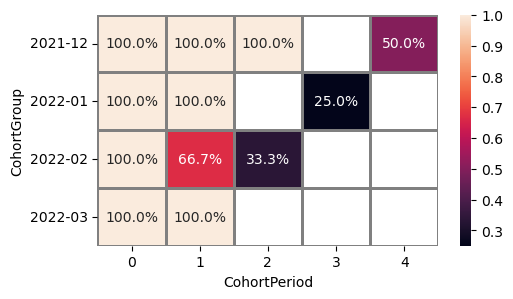

In [5]:
%%time
cohorts.cohort_heatmap(figsize=(5.5,3))

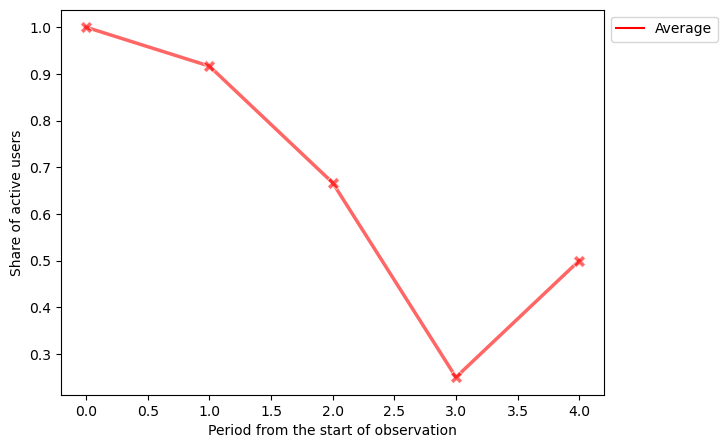

In [6]:
cohorts.cohort_lineplot(figsize=(7,5), show_plot='average')

In [9]:
source.cohorts(cohort_start_unit='M',
                  cohort_period=(1,'M'),
                  average=False,
                  cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0).cohort_matrix()

CohortPeriod,0,1,2,3,4
CohortGroup,,,,,
2021-12,1.0,1.000000,1.000000,NaN,0.5
2022-01,1.0,1.000000,NaN,0.25,NaN
2022-02,1.0,0.666667,0.333333,NaN,NaN
2022-03,1.0,1.000000,NaN,NaN,NaN


In [ ]:
source.cohorts(source.cohorts(cohort_start_unit='M',
                  cohort_period=(1,'M'),
                  average=False,
                  cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0
               ).cohort_heatmap(figsize=(5,5)))

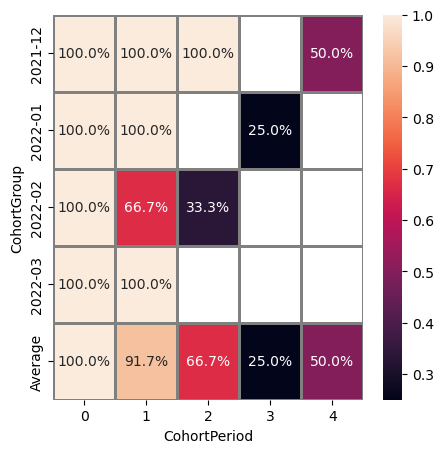

In [15]:
source.cohorts(cohort_start_unit='M',
                  cohort_period=(1,'M'),
                  average=False,
                  cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0).cohort_heatmap(figsize=(5,5))

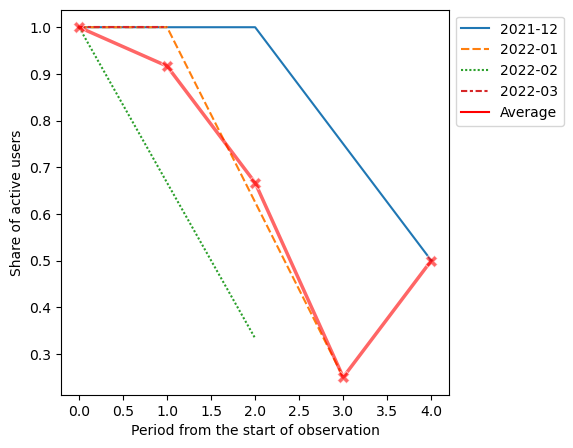

In [16]:
source.cohorts(cohort_start_unit='M',
                  cohort_period=(1,'M'),
                  average=True,
                  cut_bottom=0,
                  cut_right=0,
                  cut_diagonal=0).cohort_lineplot(figsize=(5,5), show_plot='all')